<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Automobile_Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [4]:
# Load the data for a specific sector from its CSV file
df = pd.read_csv(f"{dataset_path}/Automobile.csv")

In [5]:
# prompt: Replace the null values with mean

df.fillna(df.mean(), inplace=True)


<ipython-input-5-fbb4e2950797>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

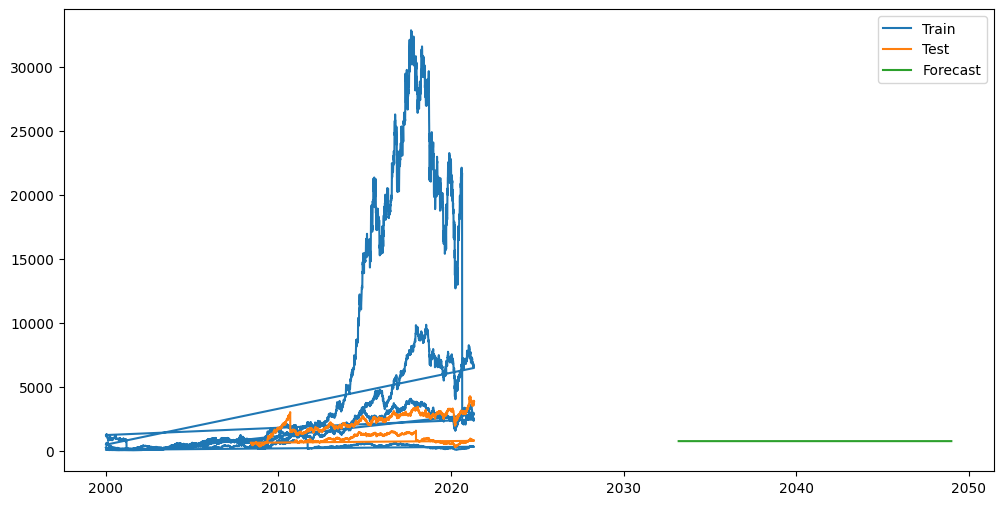

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it's already loaded
# Convert the 'Date' column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use the 'Close' price for forecasting
ts = df['Close']

# Split the data into training and testing sets
split_point = int(len(ts) * 0.8)
train, test = ts[0:split_point], ts[split_point:]

# Fit the ARIMA model
# The parameters (1,1,1) are placeholders; you should optimize these for your specific dataset
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()



# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()

In [8]:
# Use the 'close' price for forecasting
ts = df['Close']

In [9]:
# Split the data into training and testing sets
split_point = int(len(ts) * 0.8)
train, test = ts[0:split_point], ts[split_point:]

In [10]:
# Fit the ARIMA model
# The parameters (1,1,1) are placeholders and should be optimized based on the data
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [11]:
# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
# Make predictions on the test set
predictions = model_fit.predict(start=len(train), end=len(ts)-1)

# Calculate the Root Mean Squared Error (RMSE)
rmse = math.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Test RMSE: 1252.392


In [14]:
!pip install pmdarima

In [15]:
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
# Fit the Auto ARIMA model
model1 = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=305322.484, Time=65.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=305320.680, Time=0.75 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=305321.993, Time=0.94 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=305321.986, Time=2.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=305318.680, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=305323.747, Time=3.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 73.212 seconds


In [16]:
# Make predictions on the test set
predictions = model1.predict(n_periods=len(test))

# Calculate the Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

Test RMSE: 1252.322


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


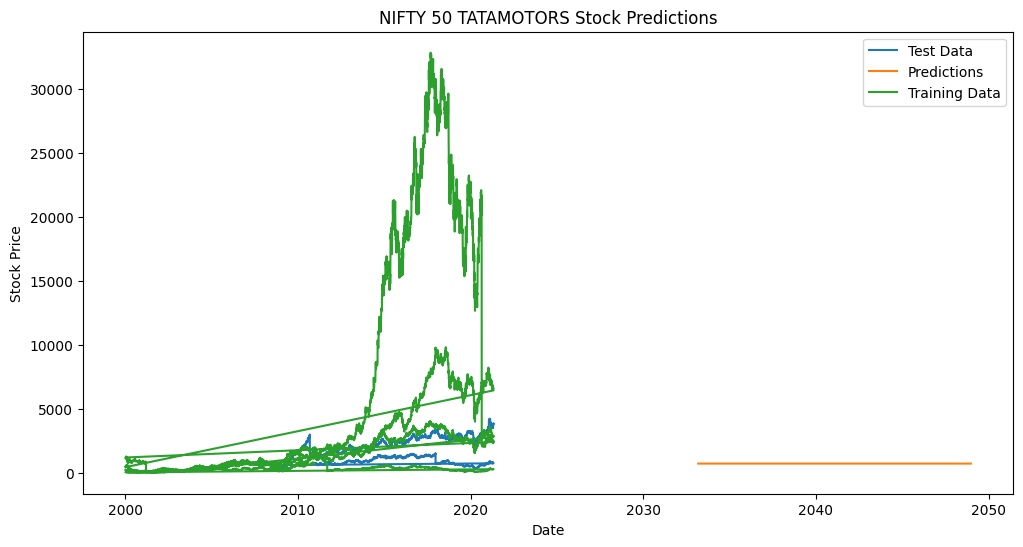

In [17]:
import matplotlib.pyplot as plt
# Make predictions on the test set
predictions = model1.predict(n_periods=len(test))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Test Data')
plt.plot(predictions.index, predictions, label='Predictions')
plt.plot(train.index, train, label='Training Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('NIFTY 50 TATAMOTORS Stock Predictions')
plt.legend()
plt.show()